In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("IMDB Dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# """# Data Visualization"""


In [3]:
data['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [4]:
data['sentiment'][1]

'positive'

In [5]:
data['review'][3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

In [6]:
data['sentiment'][3]

'negative'

In [7]:
data['sentiment'].replace('positive',1,inplace=True)
data['sentiment'].replace('negative',0,inplace=True)


In [8]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


<AxesSubplot:xlabel='sentiment', ylabel='count'>

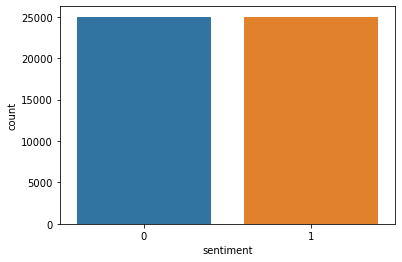

In [10]:
sns.countplot(x='sentiment',data=data)

# """# Why violin Plot is Used ?
A Violin Plot is used to visualise the distribution of the data and its probability density. This chart is a combination of a Box Plot and a Density Plot that is rotated and placed on each side, to show the distribution shape of the data.
"""

<AxesSubplot:xlabel='sentiment'>

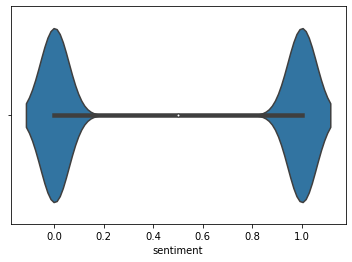

In [11]:
sns.violinplot(x='sentiment',data=data)

# Data Preprocessing

In [12]:
columns = []
for i in data.columns:
  columns.append(i)
print(columns)

['review', 'sentiment']


In [13]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [14]:
data.shape

(50000, 2)

In [15]:
data.describe()

,sentiment
count,50000.000000
mean,0.500000
std,0.500005
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [17]:
big = data['review'][0]
for i in data['review']:
  if len(i) > len(big):
    big = i
print(big)

Match 1: Tag Team Table Match Bubba Ray and Spike Dudley vs Eddie Guerrero and Chris Benoit Bubba Ray and Spike Dudley started things off with a Tag Team Table Match against Eddie Guerrero and Chris Benoit. According to the rules of the match, both opponents have to go through tables in order to get the win. Benoit and Guerrero heated up early on by taking turns hammering first Spike and then Bubba Ray. A German suplex by Benoit to Bubba took the wind out of the Dudley brother. Spike tried to help his brother, but the referee restrained him while Benoit and Guerrero ganged up on him in the corner. With Benoit stomping away on Bubba, Guerrero set up a table outside. Spike dashed into the ring and somersaulted over the top rope onto Guerrero on the outside! After recovering and taking care of Spike, Guerrero slipped a table into the ring and helped the Wolverine set it up. The tandem then set up for a double superplex from the middle rope which would have put Bubba through the table, but

In [18]:
data['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [19]:
small = data['review'][0]
for i in data['review']:
  if len(i) < len(small):
    small = i
print(small)

Read the book, forget the movie!


In [20]:
for i in range(len(data['review'])):
  if data["review"][i] == "Read the book, forget the movie!":
    print("The smallest review is at index ",i)

The smallest review is at index  27521


In [21]:
data.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


# Text Preprocessing"""

In [22]:
from tensorflow import keras
from keras.preprocessing.text import Tokenizer

# What is Tokenizer ?
Text tokenization utility class.

This class allows to vectorize a text corpus, by turning each
text into either a sequence of integers (each integer being the index
of a token in a dictionary) or into a vector where the coefficient
for each token could be binary, based on word count, based on tf-idf...
"""

In [23]:
x = data["review"]
y = data["sentiment"]

In [24]:
y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64

In [25]:
tokenizer = Tokenizer(10000,lower=True)
tokenizer.fit_on_texts(x)
x[1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [26]:
sequence = tokenizer.texts_to_sequences(x)
sequence[1]

[3,
 393,
 120,
 353,
 7,
 7,
 1,
 1385,
 2977,
 6,
 52,
 52,
 155,
 55,
 2381,
 1582,
 2,
 411,
 3,
 2,
 530,
 282,
 4,
 1847,
 5,
 1,
 438,
 412,
 7,
 7,
 1,
 150,
 23,
 568,
 69,
 2274,
 498,
 4571,
 21,
 61,
 45,
 189,
 29,
 1,
 18,
 28,
 45,
 29,
 1,
 2294,
 175,
 3336,
 96,
 22,
 67,
 371,
 63,
 1,
 791,
 9719,
 31,
 1,
 1825,
 5,
 7366,
 6594,
 21,
 61,
 6,
 9,
 69,
 278,
 1,
 147,
 18,
 9,
 6,
 3,
 407,
 2,
 2406,
 412,
 3,
 4339,
 353,
 42,
 27,
 4,
 1,
 78,
 4,
 202,
 2,
 24,
 114,
 7,
 7,
 1,
 1847,
 62,
 270,
 344,
 16,
 1,
 120,
 177,
 1,
 1029,
 4,
 1,
 2924,
 60,
 248,
 71,
 356,
 1,
 2206,
 3127,
 1289,
 1192,
 91,
 4911,
 9,
 297,
 20,
 260,
 1830,
 2,
 260,
 4592,
 583,
 16,
 1,
 134,
 3690,
 2,
 2,
 1,
 730,
 583,
 4,
 65,
 1054,
 16,
 170,
 2297,
 23,
 1977,
 69,
 221]

In [27]:
from keras.preprocessing.sequence import pad_sequences

In [28]:
encoded_sequence = pad_sequences(sequence,maxlen=200,padding='pre')
encoded_sequence[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    3,  393,  120,  353,    7,
          7,    1, 1385, 2977,    6,   52,   52,  155,   55, 2381, 1582,
          2,  411,    3,    2,  530,  282,    4, 1847,    5,    1,  438,
        412,    7,    7,    1,  150,   23,  568,   69, 2274,  498, 4571,
         21,   61,   45,  189,   29,    1,   18,   28,   45,   29,    1,
       2294,  175, 3336,   96,   22,   67,  371,   63,    1,  791, 9719,
         31,    1, 1825,    5, 7366, 6594,   21,   61,    6,    9,   69,
        278,    1,  147,   18,    9,    6,    3,  407,    2, 2406,  412,
          3, 4339,  353,   42,   27,    4,    1,   78,    4,  202,    2,
         24,  114,    7,    7,    1, 1847,   62,  2

In [29]:
import numpy as np
final_input = encoded_sequence
final_output = np.array(y)

In [30]:
final_output

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(final_input,final_output, test_size=0.33, random_state=42)

In [33]:
print(x_train.shape,y_train.shape)

(33500, 200) (33500,)


In [34]:
from keras.models import Sequential
from keras.layers import LSTM,Bidirectional,Dropout,Dense,Embedding

In [35]:
model = Sequential()
model.add(
    Embedding(
        input_dim=10000,
        output_dim=120,
        input_length=200,
    ),)
model.add(
    Bidirectional(LSTM(64, return_sequences=True))
)

In [36]:
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1))

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 120)          1200000   
                                                                 
 bidirectional (Bidirectiona  (None, 200, 128)         94720     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1,336,001
Trainable params: 1,336,001
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [39]:
prediction = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=2,batch_size=32)

Epoch 1/2
1047/1047 [==============================] - 888s 834ms/step - loss: 0.5410 - accuracy: 0.7773 - val_loss: 0.3492 - val_accuracy: 0.8661
Epoch 2/2
1047/1047 [==============================] - 1022s 976ms/step - loss: 0.4182 - accuracy: 0.8338 - val_loss: 0.4297 - val_accuracy: 0.8562


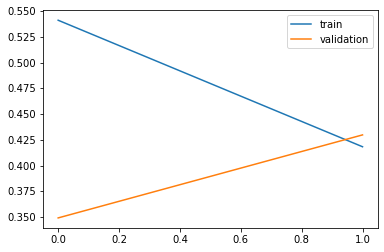

In [40]:
plt.plot(prediction.history['loss'],label='train')
plt.plot(prediction.history['val_loss'],label='validation')
plt.legend(loc='best')
plt.show()

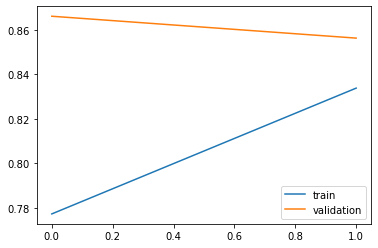

In [41]:
plt.plot(prediction.history['accuracy'],label='train')
plt.plot(prediction.history['val_accuracy'],label='validation')
plt.legend(loc='best')
plt.show()

In [42]:
model.save("imdb review.h5")

# Creating Custom review predictor bot"""

In [47]:
def imdb_bot(review):
    sentence_list = []
    sentence_list.append(review)
    sequence = tokenizer.texts_to_sequences(sentence_list)
    input = pad_sequences(sequence,maxlen=200,padding='pre')
    output = model.predict(input)
    if output.all() == 1:
        print("The reviews are good you should watch this")
    else:
        print("The reviews are not quite good you should try another one")

In [48]:
imdb_bot("tees maar khan")

The reviews are good you should watch this


In [49]:
imdb_bot("All salman khan movies")

The reviews are good you should watch this


In [50]:
imdb_bot("justice leauge dark appokalips war")

The reviews are good you should watch this
